Data on the magnitudes of earthquakes near Fiji are available on the website for this book.
Estimate the CDF $F(x)$.
Compute and plot a 95 percent confidence interval for $F$.
Find an approximate 95 percent confidence interval for $F(4.9) - F(4.3)$.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scipy.stats import norm

In [3]:
pd_data = pd.read_csv('./data/fijiquakes_cleaned.dat', delimiter='\t')
data = pd_data['mag'].to_numpy()

In [4]:
def compute_empirical_cdf(X, x):
    return [np.mean(X <= xi) for xi in x]

In [5]:
def compute_empirical_cdf_band(X, x=np.linspace(4, 6.5, 10), alpha=0.05):
    
    empirical_cdf = compute_empirical_cdf(X, x)
    
    n = len(X)
    epsilon = np.sqrt(np.log(2/alpha)/(2*n))

    cdf_lowerbound = [max(empirical_cdf[i] - epsilon, 0) for i, xi in enumerate(x)]
    cdf_upperbound = [min(empirical_cdf[i] + epsilon, 1) for i, xi in enumerate(x)]
    
    return empirical_cdf, cdf_lowerbound, cdf_upperbound

In [6]:
def plot_empirical_cdf_band(
    X,
    x=np.linspace(3.5, 6.5, 31),
    alpha=0.05,
    plot_empirical_cdf=False,
    plot_band=True
):
    
    empirical_cdf, cdf_lowerbound, cdf_upperbound = compute_empirical_cdf_band(X, x, alpha=alpha)
    
    if plot_band:
        plt.plot(x, cdf_lowerbound)
        plt.plot(x, cdf_upperbound)
    if plot_empirical_cdf:
        plt.plot(x, empirical_cdf)
        
    plt.xlabel('x')
    plt.ylabel('F_n (x)')
    plt.show()
    
    return x, empirical_cdf, cdf_lowerbound, cdf_upperbound

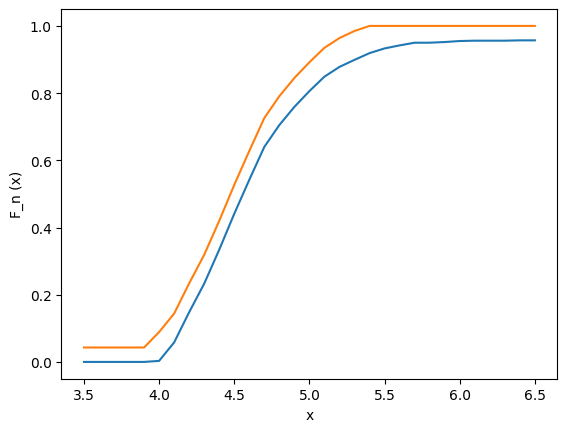

In [7]:
x, empirical_cdf, cdf_lowerbound, cdf_upperbound = plot_empirical_cdf_band(data)

In [8]:
def confidence_interval_prob(data, x, y, alpha=0.05):

    n = len(data)
    
    z = norm.isf(alpha/2)
    
    Fny = np.mean(data <= y)
    Fnx = np.mean(data <= x)

    estimator = Fny - Fnx
    var_est = (Fny-Fnx)*(1-(Fny-Fnx))
    std_err = np.sqrt(var_est/n)

    lowerbound = estimator - z*std_err
    upperbound = estimator + z*std_err
    
    return (lowerbound, upperbound)

In [9]:
lowerbound, upperbound = confidence_interval_prob(data, 4.3, 4.9)
print(
    f"The probability of an earthquake of magnitude between 4.3 and 4.9 is between "
    f"{lowerbound*100:.1f}% and {upperbound*100:.1f}%."
)

The probability of an earthquake of magnitude between 4.3 and 4.9 is between 49.5% and 55.7%.
